In [1]:
import numpy as np
import matplotlib.pyplot as plt
import access_spectrum as acs
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


In [72]:
fname = 'red_clump_12_TEFF_up4800.0_lo4700.0/eig60_minSNR50_corr30px_madFalse.pkl'
model = acs.pklread(fname)
model.R2Array, model.R2noise
model.R2noise

0.3873806506766132

In [73]:
model.eigval

array([  1.15104817e-05,   3.45065674e-06,   3.36460885e-06,
         3.11409688e-06,   2.17427108e-06,   2.05631327e-06,
         1.45904573e-06,   1.20085563e-06,   1.05718346e-06,
         9.80383096e-07,   7.73600510e-07,   8.68424881e-07,
         8.71164548e-07,   8.22255787e-07,   6.52055561e-07,
         7.31376105e-07,   6.88519431e-07,   6.30527439e-07,
         5.68729455e-07,   6.65234217e-07,   4.98325497e-07,
         4.33908901e-07,   5.41543423e-07,   5.12404105e-07,
         5.07297644e-07,   4.60453587e-07,   4.18206857e-07,
         3.46579982e-07,   3.52125278e-07,   3.51221319e-07,
         3.41398300e-07,   4.10132974e-07,   3.58279332e-07,
         3.86529629e-07,   3.15988004e-07,   3.36083737e-07,
         3.17546292e-07,   3.08695233e-07,   2.94869959e-07,
         3.05319832e-07,   3.06266678e-07,   3.47924526e-07,
         2.89098188e-07,   2.64751143e-07,   2.57379539e-07,
         2.60486069e-07,   2.43423846e-07,   2.47221189e-07,
         2.33515636e-07,

In [90]:
def consth(i,model,N,D):
    np.sqrt((1./(N*D))*np.sum(1./model.weights[model.weights!=0]))
    
def hi(i,model,N,D):
    return np.sqrt((1./N)*np.sum((1./model.weights[model.weights!=0])))

def calculate_Ncells(model,N=None,D=None,denom=None,denomfunc=None):
    Ncells = np.zeros(len(model.eigval))
    if not N or not D:
        D = model.data.shape[1]
        N = model.data.shape[0]
        print N,D
    def calcNcells(n,denom,D,N):
        if D < N:
            if not denom:
            #denom = np.sqrt(((1./(N*7214))*np.sum(1./model.weights[model.weights!=0])))
                denom = denomfunc(n,model,N,D)
                print denom
            return np.prod(np.sqrt(model.eigval[:n+1]))/((denom)**len(model.eigval[:n+1]))
        elif N < D:
            return np.prod(np.sqrt(model.eigval[:n+1]))/((D/N)*denom**len(model.eigval[:n+1]))
    for n in range(len(model.eigval)):
        Ncells[n] = calcNcells(n,denom,D,N)
    return Ncells

4107 7214


0.003392710076058745

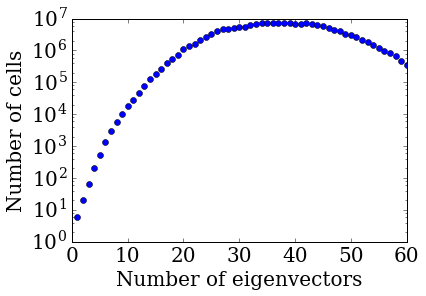

In [94]:
lamnoise = model.eigval[np.where(model.R2Array<model.R2noise)[0][-1]]
Ncells = calculate_Ncells(model,denom = np.sqrt(lamnoise))
eigvecnum = np.arange(1,len(model.eigval)+1)
plt.semilogy(eigvecnum,Ncells,'o')
plt.ylabel('Number of cells')
plt.xlabel('Number of eigenvectors')
np.sqrt(model.eigval[0])

In [92]:
model.weights.shape

(4107, 7214)

In [ ]:
print Ncells

In [ ]:
def compare_sample(direcs,titles,models,labels,colours,slopescale=0.1,savename=None,figsize=(15,6)):
    plt.figure(1,figsize=figsize)
    plt.figure(2,figsize=figsize)
    for d in range(len(direcs)):
        plt.figure(1)
        plt.subplot(1,len(direcs),d+1)
        plt.ylim(0,1)
        plt.title(titles[d],fontsize=18)
        plt.xlabel('number of eigenvectors',fontsize=14)
        plt.figure(2)
        plt.subplot(1,len(direcs),d+1)
        plt.ylim(0,slopescale)
        plt.xlabel('eigenvectors',fontsize=14)
        if d==0:
            plt.figure(1)
            plt.ylabel(r'$R^2$',fontsize=18)
            plt.yticks(fontsize=13)
            plt.figure(2)
            plt.ylabel('R2 slope',fontsize=14)
            plt.yticks(fontsize=13)
        if d!=0:
            plt.figure(1)
            plt.yticks([])
            plt.figure(2)
            plt.yticks([])
        c = 0
        for m in range(len(models)):
            model = acs.pklread('{0}/{1}'.format(direcs[d],models[m]))
            plt.xlim(-1,len(model.R2Array))
            # Find the number of eigenvectors at which R2 crosses R2noise
            slope = model.R2Array - np.roll(model.R2Array,1)
            crossvec = np.where(model.R2Array > model.R2noise)
            if crossvec[0] != []:
                crossvec = crossvec[0][0] - 1
                if crossvec < 0:
                    crossvec = 0
                plt.figure(1)
                plt.axvline(crossvec,0,model.R2Array[crossvec],color=colours[c],lw=2)
                plt.text(crossvec+0.03*len(model.R2Array),0.02,'{0}'.format(crossvec),
                         color=colours[c],weight='bold',fontsize=13)
                if crossvec > 0:
                    plt.figure(2)
                    plt.axvline(crossvec,color=colours[c],lw=3)
                    plt.plot(np.arange(1,len(model.R2Array),1),slope[1:],color=colours[c],lw=2,label=labels[m])
                    plt.axhline(np.median(slope[crossvec+1:]),color=colours[c],lw=3,ls='--')
            # Plot R2 curve
            plt.figure(1)
            if d==0 and m==0:
                plt.axhline(model.R2noise,color='k',ls='--',lw=3,label=r'$R^2_{noise}$')
            if d==len(direcs)-1:
                plt.plot(model.R2Array,color=colours[c],lw=4,label=labels[m])
            elif d!=len(direcs)-1:
                plt.plot(model.R2Array,color=colours[c],lw=4)
            plt.axhline(model.R2noise,color=colours[c],ls='--',lw=3)
            c+=1
        plt.figure(1)
        plt.xticks(np.linspace(0,len(model.R2Array),5,dtype=int)[:-1],fontsize=13)
        plt.figure(2)
        plt.xticks(np.linspace(0,len(model.R2Array),5,dtype=int)[:-1],fontsize=13)
        if d==len(direcs)-1:
            plt.figure(1)
            legend = plt.legend(loc='best',fontsize=13,title='$R^2$ calculation')
            legend.get_title().set_fontsize('16')
            legend.get_frame().set_linewidth(0.0)
        if d==0:
            plt.figure(1)
            legend = plt.legend(loc='best',fontsize=18)
            legend.get_frame().set_linewidth(0.0)
    plt.figure(1)
    plt.subplots_adjust(wspace=0)
    if savename:
        plt.savefig(savename)
    plt.figure(2)
    plt.ylim(0,0.001)
    plt.subplots_adjust(wspace=0)

In [ ]:
direcs = [#'red_clump_12_TEFF_up6268.69189453_lo4130.89257812',
          #'red_clump_12_TEFF_up4900.0_lo4700.0',
          #'red_clump_12_TEFF_up4900.0_lo4800.0',
          #'red_clump_12_TEFF_up4800.0_lo4700.0']
          #'red_giant_12_LOGG_up2.0_lo1.7',
          'red_giant_12_LOGG_up3.0_lo2.0',
          'red_giant_12_LOGG_up4.0_lo3.0']
titles = [#'all RC',
          #r'$T_{\mathrm{eff}}\,\,4700\,\,K\,\,to\,\,4900\,\,K$',
          #r'$T_{\mathrm{eff}}\,\,4800\,\,K\,\,to\,\,4900\,\,K$',
          #r'$T_{\mathrm{eff}}\,\,4700\,\,K\,\,to\,\,4800\,\,K$']
          #r'$logg\,\,1.7\,\,to\,\,2.0$',
          r'$logg\,\,2.0\,\,to\,\,3.0$',
          r'$logg\,\,3.0\,\,to\,\,4.0$',]
models = ['eig60_minSNR50_corrNone_madFalse.pkl',
          'eig60_minSNR50_corrNone_madTrue.pkl',
          'eig60_minSNR50_corr30px_madFalse.pkl']
          #'eig60_minSNR50_corr30px_madTrue.pkl']
labels = ['covariance','median absolute\ndeviation (M.A.D.)','covariance corrected']#,'M.A.D. corrected']
colours = plt.get_cmap('plasma')(np.linspace(0,0.80,len(models)))
compare_sample(direcs,titles,models,labels,colours,slopescale=0.01,savename='RG_DR12_comparison.pdf',figsize=(10,6))

In [ ]:
direcs = ['red_clump_13_TEFF_up6011.0_lo4134.5',
          'red_clump_13_TEFF_up4900.0_lo4700.0',
          'red_clump_13_TEFF_up4900.0_lo4800.0',
          'red_clump_13_TEFF_up4800.0_lo4700.0',
          #'red_giant_13_LOGG_up2.0_lo1.7',
          'red_giant_13_LOGG_up3.0_lo2.0',
          'red_giant_13_LOGG_up4.0_lo3.0']
compare_sample(direcs,titles,models,labels,colours,slopescale=0.01,savename='DR13_comparison.png')

In [ ]:
direcs = ['red_clump_12_TEFF_up4900.0_lo4800.0']
titles = [r'$T_{\mathrm{eff}}\,\,4800\,\,K\,\,to\,\,4900\,\,K$']
models = ['eig500_minSNR50_corrNone_madFalse.pkl',
          'eig500_minSNR50_corrNone_madTrue.pkl',
          'eig500_minSNR50_corr30px_madFalse.pkl']
          #'eig500_minSNR50_corr30px_madTrue.pkl']
labels =  ['covariance','median absolute\ndeviation (M.A.D.)','covariance corrected']
colours = plt.get_cmap('plasma')(np.linspace(0,0.8,len(models)))
compare_sample(direcs,titles,models,labels,colours,slopescale=0.1,savename='mammoth_eigvec.pdf',figsize=(10,8))

In [ ]:
direcs = ['clusters_12_CLUSTER_matchN6819',
          #'clusters_13_CLUSTER_matchN6819',
          'clusters_12_CLUSTER_matchN2158',
          #'clusters_13_CLUSTER_matchN2158',
          'clusters_12_CLUSTER_matchM67']
          #'clusters_13_CLUSTER_matchM67']
titles = ['N6819',
          #'N6819-DR13',
          'N2158',
          #'N2158-DR13',
          'M67']
          #'M67-DR13']
models = ['corrNone_madFalse.pkl',
          'corrNone_madTrue.pkl',
          'corr30px_madFalse.pkl']
          #'corr30px_madTrue.pkl']
labels = ['covariance','median absolute\ndeviation (M.A.D.)','covariance corrected']#,'M.A.D. corrected']
colours = plt.get_cmap('plasma')(np.linspace(0,0.80,len(models)))
compare_sample(direcs,titles,models,labels,colours,slopescale=0.1,savename='DR12_oc_comparison.pdf')

In [ ]:
direcs = ['clusters_12_CLUSTER_matchN6819']
titles = ['N6819']
models = ['corrNone_madFalse.pkl',
          'corrNone_madTrue.pkl']
labels = ['covariance','median absolute\ndeviation (M.A.D.)']
compare_sample(direcs,titles,models,labels,colours,slopescale=0.1,savename='n6819_comparison.pdf',figsize=(10,8))

In [ ]:
from empca_residuals import *

In [ ]:
rg = empca_residuals('apogee','red_giant',maskFilter,ask=True)

In [ ]:
rc = empca_residuals('apogee','red_clump',maskFilter,ask=True)

In [ ]:
def hist2d(x,y,bins=100,clabel=False):
    H,xedges,yedges = np.histogram2d(x,y,bins=bins)
    # Reorient appropriately
    H = np.rot90(H)
    H = np.flipud(H)
    Hmasked = np.ma.masked_where(H==0,H)
    plt.pcolormesh(xedges,yedges,Hmasked,
                   cmap = plt.get_cmap('plasma'),
                   vmin=0,vmax=110)
    if clabel:
        plt.colorbar(label=clabel)

In [ ]:


import matplotlib
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  14
}
matplotlib.rc('font',**font)

In [ ]:
len(rg.data),len(rc.data)

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(121)
hist2d(rg.teff,rg.logg,bins=120)
plt.ylim(4,0)
plt.xlim(6000,3500)
plt.xticks(np.arange(4000,6000,500)[::-1])
plt.ylabel(r'$logg$',fontsize=18)
plt.xlabel(r'$T_{\mathrm{eff}}\,\,[K]$',fontsize=18)
plt.title('red giant stars')
plt.subplot(122)
hist2d(rc.teff,rc.logg,clabel='number of stars',bins=80)
plt.ylim(4,0)
plt.xlim(6000,3500)
plt.xticks(np.arange(4000,6000,500)[::-1])
plt.yticks([])
plt.xlabel(r'$T_{\mathrm{eff}}\,\,[K]$',fontsize=18)
plt.title('red clump stars')
plt.subplots_adjust(wspace=0)
plt.savefig('HRdiagram.pdf')

In [ ]:
rc.show_sample_coverage()
plt.savefig('rc_coverage.pdf')

In [ ]:
rc12= empca_residuals('apogee','red_clump',maskFilter,ask=True)

In [ ]:
rc13 = empca_residuals('apogee','red_clump',maskFilter,ask=True)

In [ ]:
import matplotlib
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  14
}
matplotlib.rc('font',**font)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
rc12.imshow(rc12.spectra_errs,vmin=0.005,vmax=0.02,cmap='plasma')
plt.title('DR12')
plt.subplot(122)
rc13.imshow(rc13.spectra_errs,vmin=0.005,vmax=0.02,cmap='plasma',ylabel='')
plt.title('DR13')
plt.subplots_adjust(wspace=0.02)
plt.savefig('DR_err_comparison.png')

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
rc12.imshow(rc12.spectra,vmin=0.7,vmax=1.1,cmap='plasma')
plt.title('DR12')
plt.subplot(122)
rc13.imshow(rc13.spectra,vmin=0.7,vmax=1.1,cmap='plasma',ylabel='')
plt.title('DR13')
plt.subplots_adjust(wspace=0.02)
plt.savefig('DR_spec_comparison.png')

In [ ]:
rc12.findResiduals(gen=False)
rc13.findResiduals(gen=False)

In [ ]:
bound = 0.03
plt.figure(figsize=(15,5))
plt.subplot(121)
rc12.imshow(rc12.residuals,vmin=-bound,vmax=bound,cmap='plasma')
plt.title('DR12')
plt.subplot(122)
rc13.imshow(rc13.residuals,vmin=-bound,vmax=bound,cmap='plasma',ylabel='')
plt.title('DR13')
plt.subplots_adjust(wspace=0.02)
plt.savefig('DR_resid_comparison.png')